# DATA MODELING

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


## Model 1 - Linear Regression Machine Learning Model

#### >> Linear Regression between housing price change and Offense Rate over ten years

Training MSE: 0.1896, Test MSE: 0.1366
Training R²: 0.0092, Test R²: -0.0254


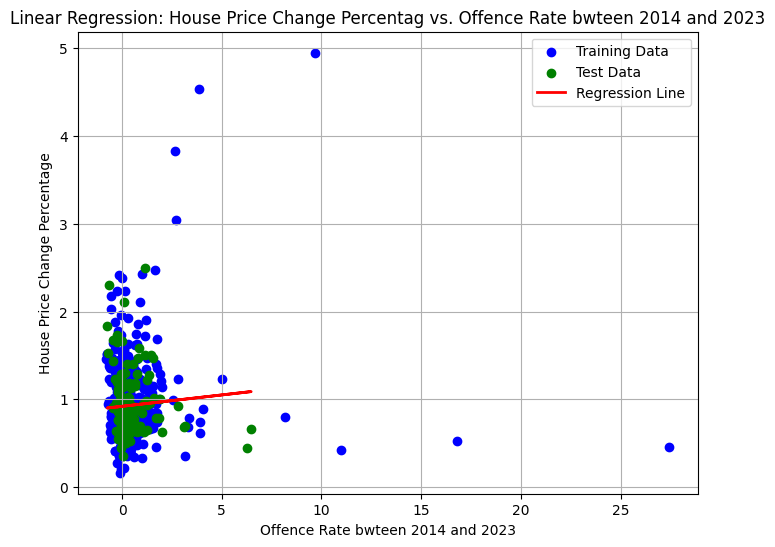

In [6]:

# Load the dataset
change_df = pd.read_csv('change_percentages.csv')

# Select features and target variable
X = change_df[['Offence Count']]  # Feature: House Price
y = change_df['House Price']  # Target: Offence Count

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on both training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the evaluation results
print(f"Training MSE: {mse_train:.4f}, Test MSE: {mse_test:.4f}")
print(f"Training R²: {r2_train:.4f}, Test R²: {r2_test:.4f}")

# Visualize the regression line and data points
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_test, y_test_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: House Price Change Percentag vs. Offence Rate bwteen 2014 and 2023')
plt.xlabel('Offence Rate bwteen 2014 and 2023')
plt.ylabel('House Price Change Percentage')
plt.legend()
plt.grid(True)
plt.show()

#### >> Linear Regression between average price and offense count

In [9]:

# Load the data
file_path_suburb = 'average_suburb.csv'
data_suburb = pd.read_csv(file_path_suburb)

# Extract the relevant columns for regression analysis
X_suburb = data_suburb[['House Price']]  # Feature (independent variable)
y_suburb = data_suburb['Offence Count']  # Target (dependent variable)

# Create and fit the linear regression model
model_suburb = LinearRegression()
model_suburb.fit(X_suburb, y_suburb)

# Predict offence count based on house price
y_pred_suburb = model_suburb.predict(X_suburb)

# Calculate the Mean Squared Error (MSE)
mse_suburb = mean_squared_error(y_suburb, y_pred_suburb)
print(f"Mean Squared Error: {mse_suburb:.4f}")

# Plot the scatter plot and the regression line
plt.figure(figsize=(8,6))
plt.scatter(X_suburb, y_suburb, color='green', label='Actual Data')
plt.plot(X_suburb, y_pred_suburb, color='orange', label='Regression Line')
plt.title('Linear Regression: Relationship Between House Price and Offence Count (Suburb)')
plt.xlabel('House Price')
plt.ylabel('Offence Count')
plt.legend()
plt.grid(True)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'average_suburb.csv'

## Model 2 - Decision Tree Machine Learning Model

#### >> Decision Tree using MORE offence variables to predict housing price

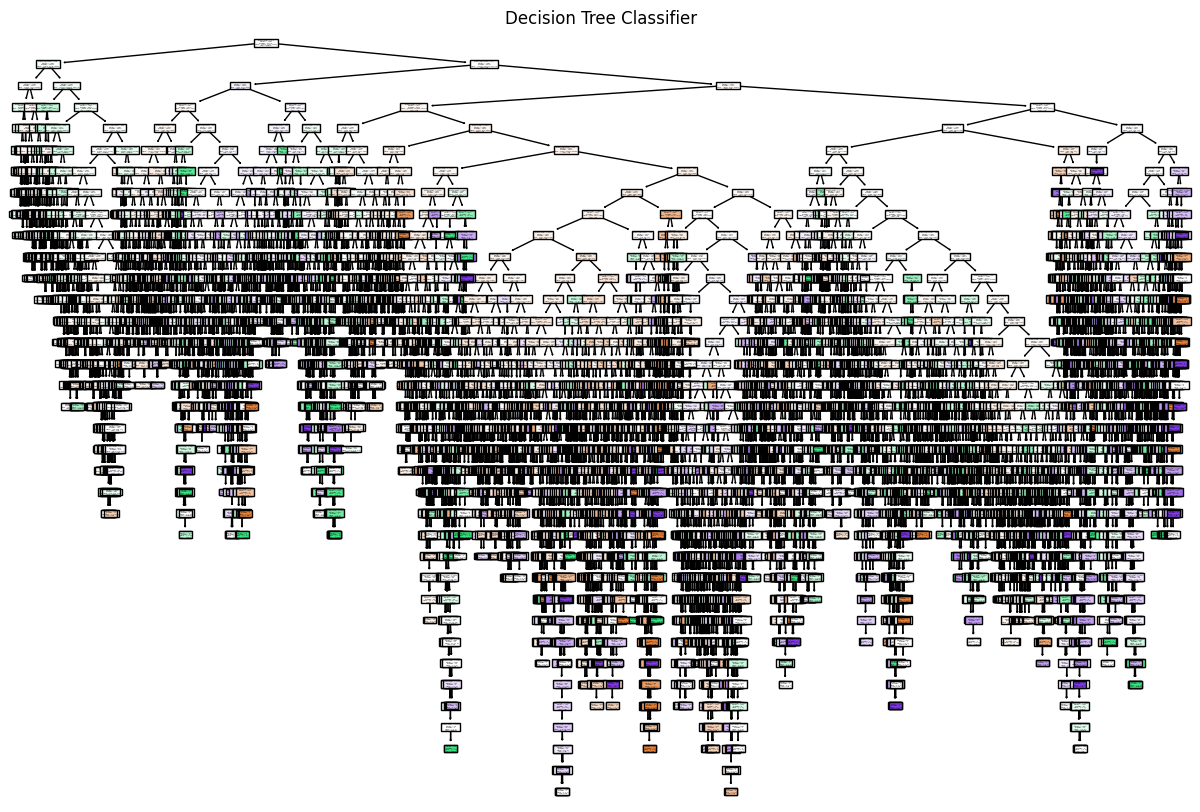

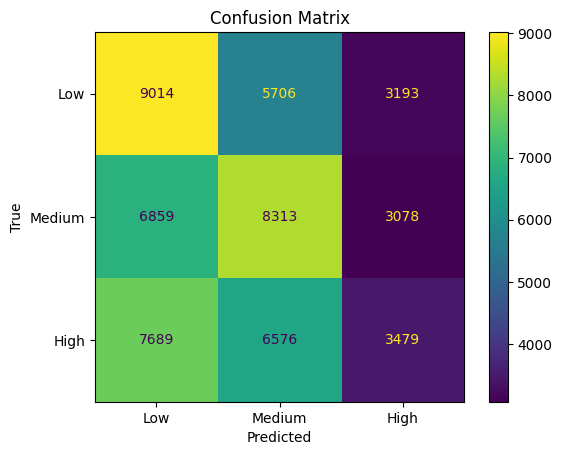

Accuracy: 0.3860
Precision: 0.3810
Recall: 0.3849
              precision    recall  f1-score   support

         Low       0.38      0.50      0.43     17913
      Medium       0.40      0.46      0.43     18250
        High       0.36      0.20      0.25     17744

    accuracy                           0.39     53907
   macro avg       0.38      0.38      0.37     53907
weighted avg       0.38      0.39      0.37     53907



In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import OrdinalEncoder

# Read your dataset
offence_with_house = pd.read_csv('encode_offence_with_house_price.csv')  # Replace with your actual file name and path

# Encode categorical data
X_df = pd.DataFrame(offence_with_house, columns=['Year', 'Year ending', 'Local Government Area', 'Postcode', 'Suburb/Town Name', 'Offence Division', 'Offence Subdivision', 'Offence Subgroup', 'Offence Count', 'House Price'])

# Automatically bin house prices into 3 categories (low, medium, high)
X_df['House Price Category'] = pd.qcut(X_df['House Price'], q=3, labels=['low', 'medium', 'high'])

# Define features and target
X = X_df[['Offence Division', 'Offence Subdivision', 'Offence Subgroup', 'Offence Count']]
y = X_df['House Price Category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)

# Plot Decision Tree
plt.figure(figsize=(15,10))
plot_tree(dt, 
          feature_names=['Offence Division', 'Offence Subdivision', 'Offence Subgroup', 'Offence Count'], 
          class_names=['low', 'medium', 'high'], 
          filled=True)
plt.title("Decision Tree Classifier")
plt.show()

# Predictions
y_pred = dt.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'Medium', 'High'])
disp.plot()
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision and recall for each class
# 'macro' average calculates the metrics for each label and then finds their unweighted mean
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# You can also generate a full classification report
report = classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High'])
print(report)